# Combining Multiple Learners (Ensemble Models)

## Michael Rawat

The codes in this notebook closely follows the original notebook prepared by previous instructors of BIA 6303-Predictive Models: Myles Gartland, Harlan Hays and Xuan Pham. 

You should bookmark this section of the scikit learn's documentation on ensemble models: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [1]:
#load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os
%matplotlib inline 
import sys

#basic methods from scikit learn package
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
print("The Python version is %s.%s.%s" % sys.version_info[:3])

The Python version is 3.9.7


In [3]:
%pwd

'C:\\Users\\micha\\OneDrive\\Desktop\\Rockhurst University\\Classes\\BIA 6303 - Predictive Models\\Module4\\code'

In [7]:
cd C:\\Users\\micha\\OneDrive\\Desktop\\Rockhurst University\\Classes\\BIA 6303 - Predictive Models\\Module4\\data

C:\Users\micha\OneDrive\Desktop\Rockhurst University\Classes\BIA 6303 - Predictive Models\Module4\data


In [8]:
#import data
df = pd.read_csv("Churn_Calls.csv", sep=",")
df.shape

(5000, 20)

In [9]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no


Our target variable is churn (last column). 

In [10]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [11]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Moving the churn column to the front. 

In [12]:
# designate target variable name
targetName = 'churn'
#print(targetName)
targetSeries = df[targetName] #notice one column is considered a series in pandas
#print(targetSeries)
#remove target from current location and insert in column number 0
del df[targetName]
df.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
df.head(5)

,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0


## Some Exploratory Data Analysis & Data Preprocessing

churn
no     4293
yes     707
Name: churn, dtype: int64


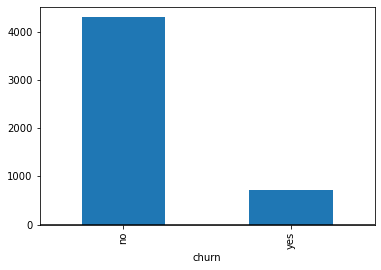

In [13]:
#Basic bar chart since the target is binominal
groupby = df.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
print(targetEDA)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

14% of the customers churned. If we are going to use a machine learning model, it needs to have better predictive performance than 86%.

We are going to do two preprocessing tasks: 1) change the target column to a numeric since many models in Scikit Learn requires integers/numeric; and 2) create dummy variables for the categorical variables. 

In [14]:
# This code turns a character/text target variable into numeric one
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
df['churn'] = le_dep.fit_transform(df['churn'])

# perform data transformation. Creates dummy variables for categorical variables. 
# very similar to the dummies() function in the dummy package in R
# I did not write this code chunk but cannot find the source to give proper credit to its creator. 
#If you do find the source, please let me know.
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

In [15]:
df.shape

(5000, 74)

In [16]:
df.columns

Index(['churn', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'sta

## Train/Test or the Holdout Method

I am using a 60/40 split (60% trainining set and 40% test set) since this is an unbalanced dataset. The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test". 

In [17]:
# split dataset into testing and training
# column location 1 to end of dataframe are the features.
# column location 0 is the target
from sklearn.model_selection  import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    df.iloc[:,1:].values, df.iloc[:,0].values, test_size=0.40, random_state=0)

In [18]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)
print("Percent of Target that is Yes", target_test.mean())

(2000, 73)
(3000, 73)
(2000,)
(3000,)
Percent of Target that is Yes 0.146


## Decision Tree

In [19]:
from sklearn import tree 
#Build
clf_dt = tree.DecisionTreeClassifier(class_weight="balanced", random_state=123)
print(clf_dt)
#Train
clf_dt = clf_dt.fit(features_train, target_train)
#Validate
target_predicted = clf_dt.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted))
# print classification report
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted, target_names=target_names))

DecisionTreeClassifier(class_weight='balanced', random_state=123)
DT Accuracy Score 0.9085
              precision    recall  f1-score   support

  Churn = no       0.95      0.95      0.95      1708
 Churn = yes       0.68      0.69      0.69       292

    accuracy                           0.91      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.91      0.91      0.91      2000



[[1615   93]
 [  90  202]]


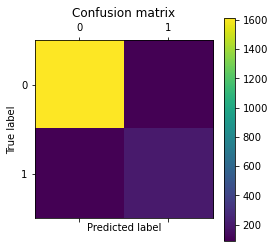

In [20]:
# Another way to visualize the confusion matrix 
cm = confusion_matrix(target_test, target_predicted)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

The decision tree classifier has an accuracy rate of 90%. The recall rate for the Yes class (my class of interest) is 69%, and the precision rate is 68%. In other words, the classifier correctly identifies 69% of churned customers. Its positive prediction is also 68% accurate. This classifier is definitely better than a weak classifier (error rate <50%) but I can probably do better. 

I also know decision trees are unstable, so I should do cross validation to get a sense of "average" performance. 

In [21]:
#verify DT with Cross Validation
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()   

Cross Validation Score for each K [0.92333333 0.89666667 0.89333333 0.92333333 0.91       0.93
 0.91333333 0.90333333 0.93       0.89666667]


0.9119999999999999

The accuracy rate for each iteration fluctuates wildly--from a low of 89% to a high of 93%. 

## Bagging (Bootstrapped Aggregation)

One approach to combining multiple learners is to generate many training sets and then train a classifier on those training sets. The process of generating new training sets from an original dataset is called bootstrapping. Here we sample from the original dataset with replacement. In the code below, I am creating 100 bootstrapped training sets. I then train a decision tree learner on those 100 bootstrapped training sets. In essence, I will have 100 trained decision tree models.

In [22]:
from sklearn.ensemble import BaggingClassifier
#Build
clf_bag = BaggingClassifier(n_estimators=100, random_state=123)
print(clf_bag)
#Train
clf_bag.fit(features_train, target_train)
#Validate 
target_predicted=clf_bag.predict(features_test)
print("Bagging Accuracy", accuracy_score(target_test, target_predicted))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted,target_names=target_names))
print(confusion_matrix(target_test, target_predicted))

BaggingClassifier(n_estimators=100, random_state=123)
Bagging Accuracy 0.9515
              precision    recall  f1-score   support

  Churn = no       0.96      0.99      0.97      1708
 Churn = yes       0.90      0.75      0.82       292

    accuracy                           0.95      2000
   macro avg       0.93      0.87      0.90      2000
weighted avg       0.95      0.95      0.95      2000

[[1684   24]
 [  73  219]]


[[1684   24]
 [  73  219]]


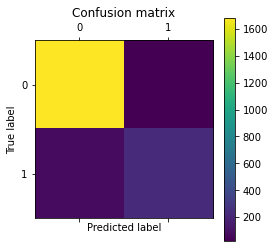

In [23]:
# Another way to visualize the confusion matrix 
cm = confusion_matrix(target_test, target_predicted)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

Overall accuracy rate has increased to 95%. The recall rate has not changed (75%), but the precision has increased quite a lot (90%). 

In [24]:
#verify bagging with cross validation
scores_bag = cross_val_score(clf_bag, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_bag)
scores_bag.mean()

Cross Validation Score for each K [0.95666667 0.95333333 0.96       0.96       0.92333333 0.96
 0.95666667 0.94666667 0.95333333 0.94666667]


0.9516666666666668

Average accuracy score is still 95%. We may want to check the other metrics like recall and precision too. I will leave that exercise for you to do.

## Random Forest

Random Forest is a variant of Bagging where only a randomly chosen subset of features are considered to split at each node (called "mtry" in caret in R and max_features in scikit-learn in Python). Each node is split on the "best" of the given subset of features.

In [25]:
from sklearn.ensemble import RandomForestClassifier
#Build
clf_rf = RandomForestClassifier(class_weight='balanced', max_features='auto', n_estimators=100, random_state=123)
#max_features = 'auto' for default. Calculated as square root of number of features.
print(clf_rf)
#Train
clf_rf.fit(features_train, target_train)
#Validate
target_predicted = clf_rf.predict(features_test)
print("Random Forfest Accuracy", accuracy_score(target_test, target_predicted))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted, target_names=target_names))
print(confusion_matrix(target_test, target_predicted))


RandomForestClassifier(class_weight='balanced', random_state=123)
Random Forfest Accuracy 0.936
              precision    recall  f1-score   support

  Churn = no       0.94      0.99      0.96      1708
 Churn = yes       0.93      0.61      0.73       292

    accuracy                           0.94      2000
   macro avg       0.93      0.80      0.85      2000
weighted avg       0.94      0.94      0.93      2000

[[1695   13]
 [ 115  177]]


[[1695   13]
 [ 115  177]]


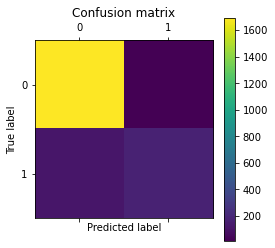

In [26]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

In [27]:
#verify RF with cross validation
scores_rf = cross_val_score(clf_rf, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_rf)
scores_rf.mean()

Cross Validation Score for each K [0.93333333 0.93666667 0.94       0.96       0.93333333 0.94333333
 0.94       0.92666667 0.94666667 0.92333333]


0.9383333333333335

We can even tune the max_features too! 

In [28]:
# use a full grid over all parametersimport time
import time
param_grid = {"max_features": [7,8,9,10]}
start = time.time()

# run grid search
grid_search = GridSearchCV(clf_rf, param_grid=param_grid,n_jobs=-1, cv=10)
grid_search.fit(features_train, target_train)
end = time.time()
print("Time to run", round(end-start), "seconds")
print(grid_search.cv_results_)
print("BEST SCORE", grid_search.best_score_)
print("BEST PARAM", grid_search.best_params_)

Time to run 2 seconds
{'mean_fit_time': array([0.5485132 , 0.56468306, 0.59825945, 0.43469391]), 'std_fit_time': array([0.0141072 , 0.01191198, 0.00712551, 0.09280766]), 'mean_score_time': array([0.01804228, 0.01842449, 0.01716418, 0.00806723]), 'std_score_time': array([0.00458986, 0.00231703, 0.00378502, 0.00310189]), 'param_max_features': masked_array(data=[7, 8, 9, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 7}, {'max_features': 8}, {'max_features': 9}, {'max_features': 10}], 'split0_test_score': array([0.94      , 0.93333333, 0.95      , 0.94      ]), 'split1_test_score': array([0.93      , 0.93666667, 0.94      , 0.94333333]), 'split2_test_score': array([0.94666667, 0.94      , 0.94333333, 0.94      ]), 'split3_test_score': array([0.96      , 0.96      , 0.96333333, 0.96666667]), 'split4_test_score': array([0.94      , 0.93333333, 0.94      , 0.94      ]), 'split5_test_score': array([0.92666667,

Increasing the max_features to 9 from 8 only slightly increases the accuracy score (from 93.8% to 94.5%). Now take a look below to see what happens when we change the performance metric from accuracy to recall. 

In [29]:
from sklearn.metrics import make_scorer
scorer = make_scorer(recall_score, pos_label=1) #using recall


param_grid = {"max_features": [7,8,9,10]}
start = time.time()
# run grid search
grid_search = GridSearchCV(clf_rf, param_grid=param_grid, n_jobs=-1, cv=10, scoring=scorer)
grid_search.fit(features_train, target_train)
end = time.time()
print("Time to run", round(end-start), "seconds")
print(grid_search.cv_results_)
print("BEST SCORE", grid_search.best_score_)
print("BEST PARAM", grid_search.best_params_)


Time to run 2 seconds
{'mean_fit_time': array([0.56053417, 0.57777078, 0.60379725, 0.46175458]), 'std_fit_time': array([0.01009277, 0.01139991, 0.01203531, 0.0833014 ]), 'mean_score_time': array([0.01736128, 0.01705709, 0.0191153 , 0.01100113]), 'std_score_time': array([0.00364274, 0.00524489, 0.00226748, 0.00437336]), 'param_max_features': masked_array(data=[7, 8, 9, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 7}, {'max_features': 8}, {'max_features': 9}, {'max_features': 10}], 'split0_test_score': array([0.56097561, 0.51219512, 0.63414634, 0.56097561]), 'split1_test_score': array([0.51219512, 0.56097561, 0.58536585, 0.6097561 ]), 'split2_test_score': array([0.63414634, 0.63414634, 0.68292683, 0.65853659]), 'split3_test_score': array([0.70731707, 0.73170732, 0.75609756, 0.75609756]), 'split4_test_score': array([0.63414634, 0.58536585, 0.63414634, 0.63414634]), 'split5_test_score': array([0.5       ,

In [30]:
print("Features sorted by their score:")
print("Only the top 20 features listed")
print(sorted(zip(map(lambda x: round(x, 4), clf_rf.feature_importances_),df.columns[1:20]), 
             reverse=True))


Features sorted by their score:
Only the top 20 features listed
[(0.13, 'total_day_charge'), (0.1269, 'number_customer_service_calls'), (0.1161, 'total_day_minutes'), (0.0487, 'total_eve_charge'), (0.0485, 'total_eve_minutes'), (0.0402, 'total_night_minutes'), (0.0379, 'total_night_charge'), (0.0362, 'total_intl_minutes'), (0.0347, 'total_intl_charge'), (0.0326, 'account_length'), (0.0324, 'total_eve_calls'), (0.0304, 'total_day_calls'), (0.0299, 'total_night_calls'), (0.0298, 'total_intl_calls'), (0.018, 'number_vmail_messages'), (0.0019, 'state_AZ'), (0.001, 'state_AR'), (0.0009, 'state_AL'), (0.0006, 'state_AK')]


## Extremely Randomized Trees (Extra Trees)

Extra Trees differs from Random Forest in the following ways: 1) sample without replacement to create training sets and 2) split nodes randomly using subset of features.

https://medium.com/@namanbhandari/extratreesclassifier-8e7fc0502c7

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
clf_xdt = ExtraTreesClassifier(n_estimators= 100, n_jobs=-1,class_weight="balanced", random_state=123)
print(clf_xdt)
clf_xdt.fit(features_train, target_train)
target_predicted=clf_xdt.predict(features_test)
print("Extra Trees Accuracy", accuracy_score(target_test,target_predicted))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted,target_names=target_names))
print(confusion_matrix(target_test, target_predicted))

ExtraTreesClassifier(class_weight='balanced', n_jobs=-1, random_state=123)
Extra Trees Accuracy 0.9195
              precision    recall  f1-score   support

  Churn = no       0.92      0.99      0.95      1708
 Churn = yes       0.92      0.49      0.64       292

    accuracy                           0.92      2000
   macro avg       0.92      0.74      0.80      2000
weighted avg       0.92      0.92      0.91      2000

[[1696   12]
 [ 149  143]]


Precision, Recall, and Accuracy have all decreased. You should spend some time to tune the hyperparameters such as max_features, max_depth, etc. 

## AdaBoost

In [32]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
clf_dt_ab = AdaBoostClassifier(tree.DecisionTreeClassifier(class_weight="balanced"),
                         algorithm="SAMME.R",
                         n_estimators=100, random_state=123)
clf_dt_ab.fit(features_train, target_train)
target_predicted=clf_dt_ab.predict(features_test)
print("Adaboost Accuracy", accuracy_score(target_test,target_predicted))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted,target_names=target_names))
print(confusion_matrix(target_test, target_predicted))

Adaboost Accuracy 0.9085
              precision    recall  f1-score   support

  Churn = no       0.95      0.94      0.95      1708
 Churn = yes       0.68      0.70      0.69       292

    accuracy                           0.91      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.91      0.91      0.91      2000

[[1613   95]
 [  88  204]]


## Gradient Boosting

Good piece on Gradient Boosting

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=123) #default learning rate is 0.1
clf_GBC.fit(features_train, target_train)
target_predicted=clf_GBC.predict(features_test)
print("Gradient Boost Accuracy", accuracy_score(target_test,target_predicted))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_predicted, target_test, target_names=target_names))
print(confusion_matrix(target_predicted, target_test))

Gradient Boost Accuracy 0.9495
              precision    recall  f1-score   support

  Churn = no       0.99      0.96      0.97      1759
 Churn = yes       0.74      0.90      0.81       241

    accuracy                           0.95      2000
   macro avg       0.86      0.93      0.89      2000
weighted avg       0.96      0.95      0.95      2000

[[1683   76]
 [  25  216]]


## Stacking

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Stacking four base learners: Logistic Regression, Naive Bayes, Random Forest, and AdaBoost Decision Tree



learner_1 = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
learner_2 = GaussianNB()
learner_3 = RandomForestClassifier(class_weight='balanced', max_features='auto', n_estimators=100)
learner_4 = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'),
                         algorithm="SAMME.R",n_estimators=100)
stacked_learner = VotingClassifier(estimators=[('lr', learner_1), ('nb', learner_2),
                                              ('rf', learner_3), ('adaboost', learner_4)], voting='hard')
for MV, label in zip([learner_1, learner_2, learner_3, learner_4, stacked_learner], 
                     ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'AdaBoost Decision Tree', 'Second Stage Learner']):
    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))

Accuracy: 0.76 (+/- 0.02) [Logistic Regression]
Accuracy: 0.59 (+/- 0.07) [Naive Bayes]
Accuracy: 0.94 (+/- 0.01) [Random Forest]
Accuracy: 0.92 (+/- 0.01) [AdaBoost Decision Tree]
Accuracy: 0.93 (+/- 0.01) [Second Stage Learner]


## ROC Curve

Here is a code chunk that I adapted from Abdullah Al Imran on drawing multiple ROC curves on a single plot.

Here is the source code:
Al Imran, A. (2019). Drawing multiple roc-curves in a single plot. Retrieved from https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot.

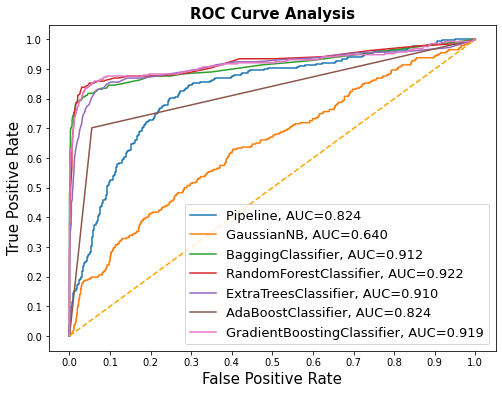

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced')), 
               GaussianNB(), 
               BaggingClassifier(n_estimators=100),
               RandomForestClassifier(class_weight='balanced', max_features='auto', n_estimators=100), 
               ExtraTreesClassifier(n_estimators= 100, n_jobs=-1,class_weight="balanced"),
               AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'),algorithm="SAMME.R",n_estimators=100),
               GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(features_train, target_train)
    target_predicted = model.predict_proba(features_test)[::,1]
    
    fpr, tpr, _ = roc_curve(target_test,  target_predicted)
    auc = roc_auc_score(target_test, target_predicted)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()